In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
#file_path = 'path/to/your/datasetclustering.xlsx'
#df = pd.read_excel(r'datasetclustering.xls')

df = pd.read_excel(r'datasetclusteringpakeini.xlsx')
df



,diagnosa,institusi,area,tipe,biaya_berobat,cluster
0,jantung,rumah sakit,bandung,spesialis penyakit dalam,200001 s.d 500000,layanan spesialis kompleks
1,jantung,rumah sakit,bandung,spesialis lain-lain,1000001 s.d 3000000,layanan spesialis kompleks
2,kulit,rumah sakit,bandung,spesialis lain-lain,50001 s.d 200000,layanan spesialis kompleks
3,jantung,rumah sakit,bandung,spesialis lain-lain,1000001 s.d 3000000,layanan spesialis kompleks
4,jantung,rumah sakit,bandung,spesialis lain-lain,500001 s.d 1000000,layanan spesialis kompleks
...,...,...,...,...,...,...
844,pemeriksaan,poliklinik,garut,dokter umum,200001 s.d 500000,layanan dasar ekonomis
845,mata,poliklinik,garut,spesialis mata,200001 s.d 500000,layanan dasar ekonomis
846,gerd,rumah sakit,garut,dokter umum,1000001 s.d 3000000,layanan dasar ekonomis
847,gigi,rumah sakit,sukabumi,spesialis gigi dan mulut,50001 s.d 200000,layanan dasar ekonomis


In [2]:
# prompt: hitung record tiap kelas pada atribut terakhir

# Group the data by the last attribute and count the number of records in each group
grouped_data = df.groupby(df.columns[-1]).size()

# Print the results
print(grouped_data)


cluster
layanan dasar ekonomis        310
layanan spesialis kompleks    247
layanan spesialis menengah    292
dtype: int64


In [5]:
# prompt: install labelEncoder

!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder


In [46]:
# Label encoding untuk kolom 'diagnosa'
le_diagnosa = LabelEncoder()
le_institusi = LabelEncoder()
le_area = LabelEncoder()
le_tipe = LabelEncoder()
le_biaya_berobat = LabelEncoder()
le_cluster = LabelEncoder()
df['diagnosa_encod'] = le_diagnosa.fit_transform(df['diagnosa'])
df['institusi_encod'] = le_institusi.fit_transform(df['institusi'])
df['area_encod'] = le_area.fit_transform(df['area'])
df['tipe_encod'] = le_tipe.fit_transform(df['tipe'])
df['biaya_berobat_encod'] = le_biaya_berobat.fit_transform(df['biaya_berobat'])
df['cluster_encod'] = le_cluster.fit_transform(df['cluster'])

In [47]:
df

,diagnosa,institusi,area,tipe,biaya_berobat,cluster,diagnosa_encod,institusi_encod,area_encod,tipe_encod,biaya_berobat_encod,cluster_encod
0,jantung,rumah sakit,bandung,spesialis penyakit dalam,200001 s.d 500000,layanan spesialis kompleks,20,3,1,17,1,1
1,jantung,rumah sakit,bandung,spesialis lain-lain,1000001 s.d 3000000,layanan spesialis kompleks,20,3,1,12,0,1
2,kulit,rumah sakit,bandung,spesialis lain-lain,50001 s.d 200000,layanan spesialis kompleks,25,3,1,12,4,1
3,jantung,rumah sakit,bandung,spesialis lain-lain,1000001 s.d 3000000,layanan spesialis kompleks,20,3,1,12,0,1
4,jantung,rumah sakit,bandung,spesialis lain-lain,500001 s.d 1000000,layanan spesialis kompleks,20,3,1,12,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
844,pemeriksaan,poliklinik,garut,dokter umum,200001 s.d 500000,layanan dasar ekonomis,30,2,6,0,1,0
845,mata,poliklinik,garut,spesialis mata,200001 s.d 500000,layanan dasar ekonomis,28,2,6,13,1,0
846,gerd,rumah sakit,garut,dokter umum,1000001 s.d 3000000,layanan dasar ekonomis,14,3,6,0,0,0
847,gigi,rumah sakit,sukabumi,spesialis gigi dan mulut,50001 s.d 200000,layanan dasar ekonomis,15,3,15,10,4,0


In [48]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [49]:
# prompt: buang kolom pada df2 mulai dari kolom diagnosa, institusi, area, tipe, biaya_berobat, cluster

df = df.drop(columns=['diagnosa', 'institusi', 'area', 'tipe', 'biaya_berobat', 'cluster'])


In [50]:
df

,diagnosa_encod,institusi_encod,area_encod,tipe_encod,biaya_berobat_encod,cluster_encod
0,20,3,1,17,1,1
1,20,3,1,12,0,1
2,25,3,1,12,4,1
3,20,3,1,12,0,1
4,20,3,1,12,3,1
...,...,...,...,...,...,...
844,30,2,6,0,1,0
845,28,2,6,13,1,0
846,14,3,6,0,0,0
847,15,3,15,10,4,0


In [51]:
# Memisahkan fitur (X) dan label (y)
x = df[['diagnosa_encod', 'institusi_encod', 'area_encod', 'tipe_encod', 'biaya_berobat_encod', 'cluster_encod']]
y = df['cluster_encod']  # Mengasumsikan 'diagnosa' adalah label kelas

In [52]:
# Menampilkan distribusi kelas sebelum SMOTE
print("Distribusi kelas sebelum SMOTE:")
print(Counter(y))

Distribusi kelas sebelum SMOTE:
Counter({0: 310, 2: 292, 1: 247})


In [53]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [54]:
# Menampilkan distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:")
print(Counter(y_resampled))

Distribusi kelas setelah SMOTE:
Counter({1: 310, 2: 310, 0: 310})


In [55]:

# Membuat DataFrame baru dengan data yang telah diseimbangkan
df_smote = pd.DataFrame(x_resampled, columns=['diagnosa_encod', 'institusi_encod', 'area_encod', 'tipe_encod', 'biaya_berobat_encod', 'cluster_encod'])
df_smote['diagnosa_encod'] = y_resampled

In [56]:
df_smote

,diagnosa_encod,institusi_encod,area_encod,tipe_encod,biaya_berobat_encod,cluster_encod
0,1,3,1,17,1,1
1,1,3,1,12,0,1
2,1,3,1,12,4,1
3,1,3,1,12,0,1
4,1,3,1,12,3,1
...,...,...,...,...,...,...
925,2,2,6,0,4,2
926,2,2,6,0,4,2
927,2,2,6,0,4,2
928,2,2,15,0,4,2


In [57]:
# Mengembalikan encoding ke bentuk asli
"""
df_resampled['institusi'] = le.inverse_transform(df_resampled['institusi'].astype(int))
df_resampled['type_dokter'] = le.inverse_transform(df_resampled['type_dokter'].astype(int))
"""


df_smote['institusi_encod'] = le_institusi.inverse_transform(df_smote['institusi_encod'])
df_smote['area_encod'] = le_area.inverse_transform(df_smote['area_encod'])
df_smote['tipe_encod'] = le_tipe.inverse_transform(df_smote['tipe_encod'])
df_smote['biaya_berobat_encod'] = le_biaya_berobat.inverse_transform(df_smote['biaya_berobat_encod'])
df_smote['cluster_encod'] = le_cluster.inverse_transform(df_smote['cluster_encod'])
df_smote['diagnosa_encod'] = le_diagnosa.inverse_transform(df_smote['diagnosa_encod'])

In [58]:
df_smote

,diagnosa_encod,institusi_encod,area_encod,tipe_encod,biaya_berobat_encod,cluster_encod
0,arthritis,rumah sakit,bandung,spesialis penyakit dalam,200001 s.d 500000,layanan spesialis kompleks
1,arthritis,rumah sakit,bandung,spesialis lain-lain,1000001 s.d 3000000,layanan spesialis kompleks
2,arthritis,rumah sakit,bandung,spesialis lain-lain,50001 s.d 200000,layanan spesialis kompleks
3,arthritis,rumah sakit,bandung,spesialis lain-lain,1000001 s.d 3000000,layanan spesialis kompleks
4,arthritis,rumah sakit,bandung,spesialis lain-lain,500001 s.d 1000000,layanan spesialis kompleks
...,...,...,...,...,...,...
925,asam urat,poliklinik,garut,dokter umum,50001 s.d 200000,layanan spesialis menengah
926,asam urat,poliklinik,garut,dokter umum,50001 s.d 200000,layanan spesialis menengah
927,asam urat,poliklinik,garut,dokter umum,50001 s.d 200000,layanan spesialis menengah
928,asam urat,poliklinik,sukabumi,dokter umum,50001 s.d 200000,layanan spesialis menengah


In [59]:
# prompt: hitung record tiap kelas pada atribut terakhir

# Group the data by the last attribute and count the number of records in each group
grouped_data = df_smote.groupby(df_smote.columns[-1]).size()

# Print the results
print(grouped_data)


cluster_encod
layanan dasar ekonomis        310
layanan spesialis kompleks    310
layanan spesialis menengah    310
dtype: int64


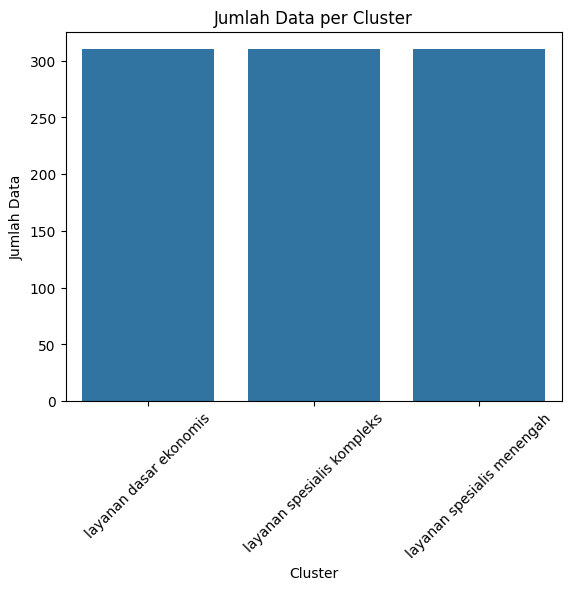

In [61]:
# prompt: buat visualisi plotbarnya dari kode baris ke 59

import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of the grouped data
sns.barplot(x=grouped_data.index, y=grouped_data.values)

# Add title and labels
plt.title('Jumlah Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [63]:
from google.colab import files
df_smote.to_excel('datasetsmote.xlsx')
files.download('datasetsmote.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>